## ===================== LENA ROSMAYANI_DBA2220141 ============================

# **CHECKPOINT 2**


### **1. DATA UNDERSTANDING**

#### 1.1 Import Library dan CSV files


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from pandas import Series

from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
from matplotlib.pylab import rcParams

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import sys
import itertools

import seaborn as sns
%matplotlib inline
sales = pd.read_csv('/content/drive/MyDrive/Final Project/sales.csv')

<Figure size 1280x960 with 0 Axes>

#### 1.2 Explor Data Sales

In [ ]:
sales.shape

(180508, 12)

In [ ]:
sales.head()

id  order_id  user_id       brand    cost   category   status  \
0  88676     61464    49453   SEX NIGHT  12.328  Intimates  Shipped   
1  86897     60212    48447      Diesel  10.534  Underwear  Shipped   
2  85439     59192    47670   SEX NIGHT  11.799  Intimates  Shipped   
3  82702     57300    46121  Shadowline  11.431  Intimates  Shipped   
4  82377     57084    45954       Hanes  10.833  Underwear  Shipped   

            created_at           shipped_at delivered_at returned_at  \
0  2021-10-03 03:46:39  2021-10-04 20:55:00          NaN         NaN   
1  2022-02-06 06:51:28  2022-02-04 23:45:00          NaN         NaN   
2  2022-04-27 09:31:17  2022-04-25 15:27:00          NaN         NaN   
3  2022-05-05 10:15:20  2022-05-03 21:07:00          NaN         NaN   
4  2022-01-02 01:45:43  2021-12-30 18:58:00          NaN         NaN   

   sale_price  
0        23.0  
1        23.0  
2        23.0  
3        23.0  
4        23.0

## **2. DATA PREPARATION**

#### 2.1 Menghilangkan kolom yang tidak diperlukan

In [ ]:
sales = sales.drop(['order_id'], axis=1)

#### 2.2 Cek data null dan handling missing values

In [ ]:
sales.isnull().sum()

id                   0
user_id              0
brand              143
cost                 0
category             0
status               0
created_at           0
shipped_at       63006
delivered_at    117473
returned_at     162756
sale_price           0
dtype: int64

In [ ]:
# Missing Value di kolom name dan brand dihapus
sales.dropna( subset = ['brand'], axis=0, inplace=True)

In [ ]:
sales.isnull().sum()

id                   0
user_id              0
brand                0
cost                 0
category             0
status               0
created_at           0
shipped_at       62970
delivered_at    117383
returned_at     162631
sale_price           0
dtype: int64

# **CHECKPOINT 3**





#### 2.3 Data Exploration

In [ ]:
#Menampilkan Info data
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180365 entries, 0 to 180507
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            180365 non-null  int64  
 1   user_id       180365 non-null  int64  
 2   brand         180365 non-null  object 
 3   cost          180365 non-null  float64
 4   category      180365 non-null  object 
 5   status        180365 non-null  object 
 6   created_at    180365 non-null  object 
 7   shipped_at    117395 non-null  object 
 8   delivered_at  62982 non-null   object 
 9   returned_at   17734 non-null   object 
 10  sale_price    180365 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 16.5+ MB


In [ ]:
#menampilkan lima data pertama dari atas
sales.head()

id  user_id       brand    cost   category   status  \
0  88676    49453   SEX NIGHT  12.328  Intimates  Shipped   
1  86897    48447      Diesel  10.534  Underwear  Shipped   
2  85439    47670   SEX NIGHT  11.799  Intimates  Shipped   
3  82702    46121  Shadowline  11.431  Intimates  Shipped   
4  82377    45954       Hanes  10.833  Underwear  Shipped   

            created_at           shipped_at delivered_at returned_at  \
0  2021-10-03 03:46:39  2021-10-04 20:55:00          NaN         NaN   
1  2022-02-06 06:51:28  2022-02-04 23:45:00          NaN         NaN   
2  2022-04-27 09:31:17  2022-04-25 15:27:00          NaN         NaN   
3  2022-05-05 10:15:20  2022-05-03 21:07:00          NaN         NaN   
4  2022-01-02 01:45:43  2021-12-30 18:58:00          NaN         NaN   

   sale_price  
0        23.0  
1        23.0  
2        23.0  
3        23.0  
4        23.0

In [ ]:
# merubah tipe data menjadi tipe data yang sesuai
sales['id'] = sales['id'].astype("object")
sales['user_id'] = sales['user_id'].astype("object")

In [ ]:
# ubah tipe data yang tanggal dari object jadi datetime
import datetime as dt
sales['created_at'] = pd.to_datetime(sales['created_at'])
sales['created_at'] = sales['created_at'].dt.date.astype("datetime64[ns]")
sales['shipped_at'] = pd.to_datetime(sales['shipped_at'])
sales['shipped_at'] = sales['shipped_at'].dt.date.astype("datetime64[ns]")
sales['delivered_at'] = pd.to_datetime(sales['delivered_at'])
sales['delivered_at'] = sales['delivered_at'].dt.date.astype("datetime64[ns]")
sales['returned_at'] = pd.to_datetime(sales['returned_at'])
sales['returned_at'] = sales['returned_at'].dt.date.astype("datetime64[ns]")

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180365 entries, 0 to 180507
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            180365 non-null  object        
 1   user_id       180365 non-null  object        
 2   brand         180365 non-null  object        
 3   cost          180365 non-null  float64       
 4   category      180365 non-null  object        
 5   status        180365 non-null  object        
 6   created_at    180365 non-null  datetime64[ns]
 7   shipped_at    117395 non-null  datetime64[ns]
 8   delivered_at  62982 non-null   datetime64[ns]
 9   returned_at   17734 non-null   datetime64[ns]
 10  sale_price    180365 non-null  float64       
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 16.5+ MB


In [ ]:
# cek data duplikat atau tidak
sales.duplicated().any()

False

In [ ]:
#melihat deskriptif statistik dari kolom numerical (hanya sale price)
sales.describe().round(2)

cost  sale_price
count  180365.00   180365.00
mean       28.77       59.82
std        30.64       65.86
min         0.01        0.02
25%        11.40       24.90
50%        19.97       39.99
75%        34.73       69.96
max       557.15      999.00

In [ ]:
# Menghitung baris yang unik berdasarkan status
sales['status'].value_counts()

Shipped       54413
Complete      45248
Processing    36206
Cancelled     26764
Returned      17734
Name: status, dtype: int64

In [ ]:
# Menghitung baris yang unik berdasarkan category
sales['category'].value_counts()

Intimates                        13411
Jeans                            12708
Fashion Hoodies & Sweatshirts    11848
Tops & Tees                      11751
Sleep & Lounge                   11164
Swim                             11155
Sweaters                         11090
Shorts                           11014
Accessories                       9802
Active                            9136
Outerwear & Coats                 8999
Underwear                         7621
Pants                             7122
Socks                             6069
Dresses                           5365
Suits & Sport Coats               5154
Maternity                         5013
Plus                              4214
Socks & Hosiery                   3812
Pants & Capris                    3398
Leggings                          3174
Blazers & Jackets                 3125
Skirts                            2069
Suits                             1046
Jumpsuits & Rompers                885
Clothing Sets            

<Axes: xlabel='sale_price'>

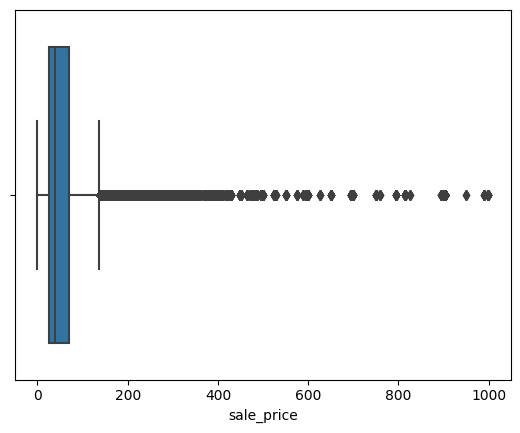

In [ ]:
# cek outliers
sns.boxplot(x=sales['sale_price'])
#sales[['sale_price']].boxplot()


# **CHECKPOINT 4**

## **3. MODELLING**

<Axes: >

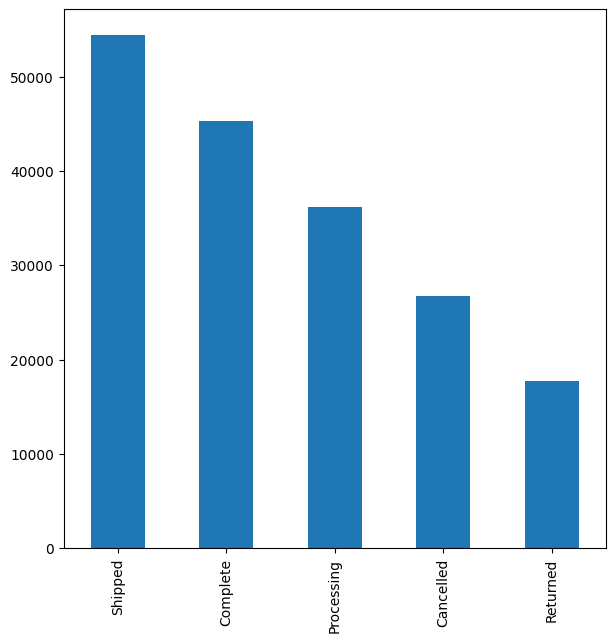

In [ ]:
# presantase tiap kategori - pie chart
sales['status'].value_counts().plot(figsize=(7,7),kind='bar')


In [ ]:
sales.to_csv('sales3.csv')

#### 3.1 Filtering and Pemilihan/Akses Nilai (Value)

In [ ]:
# Memilih semua data order yg Complete
sales=sales[sales['status'] == "Complete"]
sales

id user_id        brand        cost           category    status  \
108444   48925   27343   Wrightsock    7.853010             Active  Complete   
108445   15590    8799    Pendleton  112.749425           Sweaters  Complete   
108446    2123    1161   Anne Klein  102.444556  Blazers & Jackets  Complete   
108447  157560   87441    Allegra K    4.068470             Skirts  Complete   
108448  164685   91388    Allegra K    4.068470             Skirts  Complete   
...        ...     ...          ...         ...                ...       ...   
153722  129778   71979  Eddie Bauer   14.534000        Tops & Tees  Complete   
153723  126996   70435   2b by bebe   14.757600        Tops & Tees  Complete   
153724  126564   70202    SmartWool   12.325950             Active  Complete   
153725  121476   67390           DC   12.381850        Accessories  Complete   
153726  118905   65960  Eddie Bauer   16.294850        Tops & Tees  Complete   

       created_at shipped_at delivered_at returned_at  sale_price  
108444 2020-08-28 2020-08-29   2020-08-31         NaT   17.490000  
108445 2022-01-06 2022-01-07   2022-01-10         NaT  264.670013  
108446 2022-03-20 2022-03-23   2022-03-24         NaT  280.670013  
108447 2022-03-11 2022-03-12   2022-03-12         NaT    9.310000  
108448 2021-10-08 2021-10-05   2021-10-08         NaT    9.310000  
...           ...        ...          ...         ...         ...  
153722 2021-06-08 2021-06-09   2021-06-11         NaT   27.950001  
153723 2021-03-06 2021-03-07   2021-03-09         NaT   27.950001  
153724 2022-05-25 2022-05-28   2022-05-30         NaT   27.950001  
153725 2021-12-16 2021-12-14   2021-12-16         NaT   27.950001  
153726 2020-11-15 2020-11-16   2020-11-19         NaT   27.950001  

[45248 rows x 11 columns]

In [ ]:
# Drop kolom returned
sales = sales.drop(['returned_at', 'cost'], axis=1)

In [ ]:
# Grouping menurut delivered date
sales_complete = sales.groupby(['delivered_at']).sum().reset_index()
sales_complete

delivered_at    sale_price
0      2019-01-06     97.949997
1      2019-01-15    138.269999
2      2019-01-18     22.000000
3      2019-01-24    172.469997
4      2019-01-29     82.939997
...           ...           ...
1198   2022-06-06  11967.360020
1199   2022-06-07   7454.840018
1200   2022-06-08   2251.440002
1201   2022-06-09    755.280005
1202   2022-06-10    189.000000

[1203 rows x 2 columns]

In [ ]:
# Set kolom delivered_at sebagai index
sales_complete2 = sales_complete.set_index(['delivered_at'])
sales_complete2.head()

sale_price
delivered_at            
2019-01-06     97.949997
2019-01-15    138.269999
2019-01-18     22.000000
2019-01-24    172.469997
2019-01-29     82.939997

In [ ]:
# Summary statistics pada variabel 'sale_price'
print (sales_complete.describe().T)
print ('sale_price')

# Pembulatan decimal 2 angka di belakang koma
print(sales_complete.describe().T.round(2))

             count         mean          std   min         25%      50%  \
sale_price  1203.0  2243.912247  2397.424812  7.95  635.850008  1497.27   

                    75%          max  
sale_price  3002.714997  24138.41998  
sale_price
             count     mean      std   min     25%      50%      75%       max
sale_price  1203.0  2243.91  2397.42  7.95  635.85  1497.27  3002.71  24138.42


#### 3.2 Time Series Plot




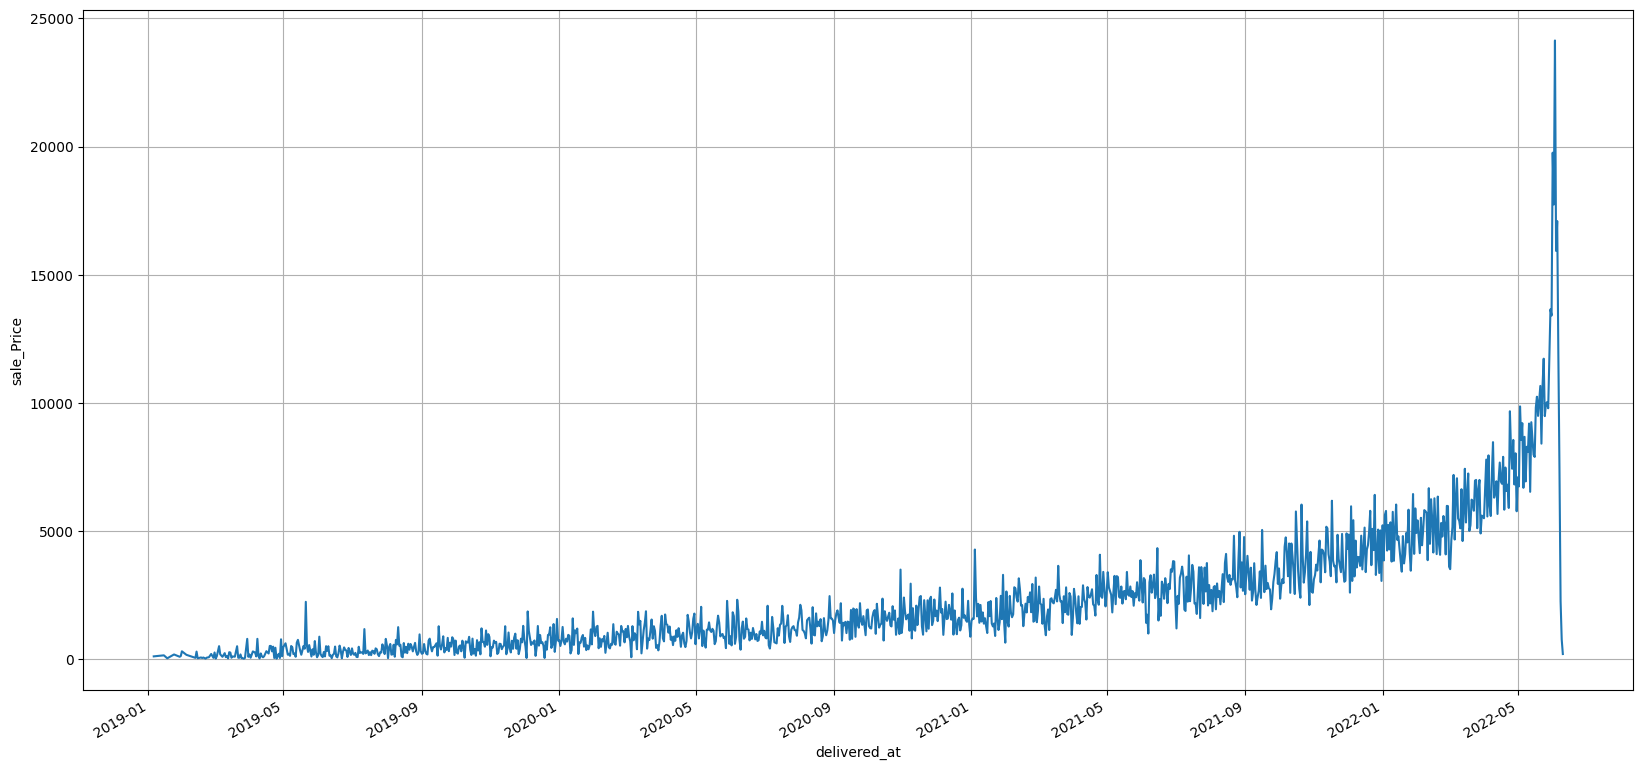

In [ ]:
# Time Series plot

import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("delivered_at")
plty.ylabel("sale_Price")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(sales_complete2)
fig.autofmt_xdate()
plty.grid()
plty.show()


> **Insights:**

* Dari grafik di atas, kita dapat melihat bahwa dari data harga penjualan memiliki kombinasi yang terdiri dari beberapa pola yaitu tren yang menaik selama kurun waktu 2,5 tahun (Januari 2019 s/d Juni 2022).


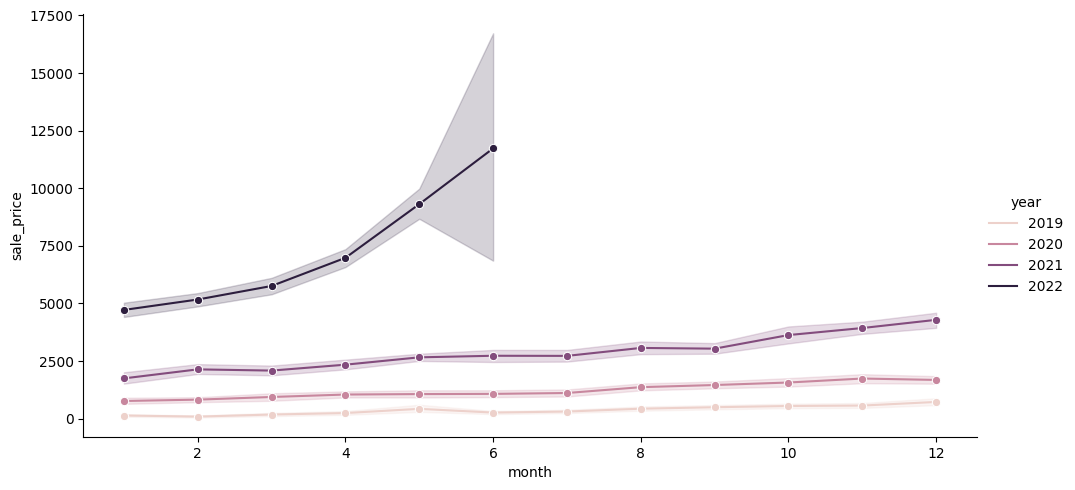

In [ ]:
# Seasonal plot

sales_complete3 = sales_complete2.reset_index()
sales_complete3['year'] = pd.DatetimeIndex(sales_complete3['delivered_at']).year
sales_complete3['month'] = pd.DatetimeIndex(sales_complete3['delivered_at']).month

# parameter hue digunakan untuk menampilkan multiple line chart berdasarkan tahun ('year')
sns.relplot (kind = 'line', data = sales_complete3, x = 'month', y = 'sale_price', hue = 'year', aspect = 2, marker='o' )

##### 3.2.1 Stationarity Check

a. Rolling Statistic test



In [ ]:
# rolling dengan interval window sebesar 12 bulan dan hitung rata-rata
rolmean=sales_complete2.rolling(window=12).mean()

# rolling dengan interval window sebesar 12 bulan dan hitung st. deviasi
rolstd=sales_complete2.rolling(window=12).std()

# Tampilkan 15 baris pertama dari hasil rolling mean
print('15 baris pertama rolling mean: ')
print(rolmean.head(15))
print ('')

# Tampilkan 15 baris pertama dari hasil rolling st. deviasi
print('15 baris pertama std. deviasi: ')
print(rolstd.head(15))

15 baris pertama rolling mean: 
              sale_price
delivered_at            
2019-01-06           NaN
2019-01-15           NaN
2019-01-18           NaN
2019-01-24           NaN
2019-01-29           NaN
2019-01-30           NaN
2019-01-31           NaN
2019-02-04           NaN
2019-02-12           NaN
2019-02-13           NaN
2019-02-14           NaN
2019-02-17    123.464166
2019-02-18    118.051666
2019-02-19    111.029167
2019-02-21    110.111667

15 baris pertama std. deviasi: 
              sale_price
delivered_at            
2019-01-06           NaN
2019-01-15           NaN
2019-01-18           NaN
2019-01-24           NaN
2019-01-29           NaN
2019-01-30           NaN
2019-01-31           NaN
2019-02-04           NaN
2019-02-12           NaN
2019-02-13           NaN
2019-02-14           NaN
2019-02-17     92.184306
2019-02-18     95.659747
2019-02-19     97.122560
2019-02-21     98.087275


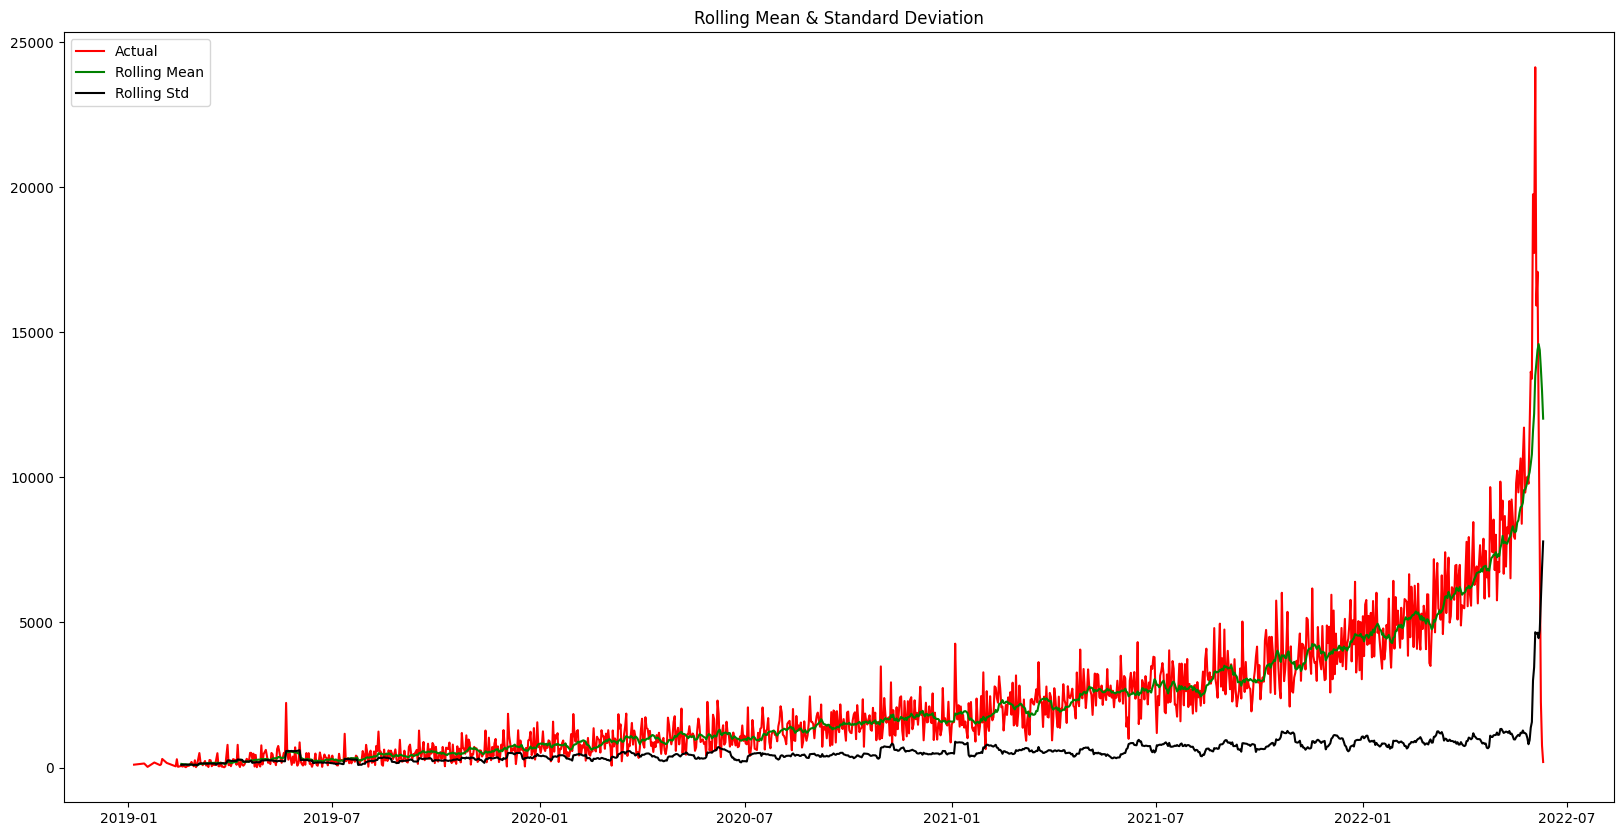

In [ ]:
# atur ukuran chart
plt.figure(figsize=(20,10))

# buat multiple line chart berdasarkan warna dan label
actual=plt.plot(sales_complete2, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean')
std_6=plt.plot(rolstd, color='black', label='Rolling Std')

# tampilkan legend, judul dari chart, dan panggil function untuk menampilkan chart
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

> **Insights:**

Dari grafik di atas kita dapat melihat bahwa data aktual dan rolling (mean dan std) memiliki bentuk yang cukup berbeda, menandakan bahwa **series** ini **tidak stasioner**.

b. Augmented Dickey-Fuller (ADF) test

* Selanjutnya, kita akan gunakan ADF test untuk uji stasioner dimana:

  **H0:** *The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.*

 **H1:** *The time series is stationary.*

* Jika p-value test kurang dari significance level (contoh alpha = 0.05) dan nilai ADF test lebih kecil dibandingkan critical values maka kita dapat reject null hypothesis dan dapat menyimpulkan bahwa time series adalah stasioner.

In [ ]:
# menggunakan function adfuller() yang diterapkan pada variable sale_priceprint('Dickey-Fuller Test: ')
dftest=adfuller(sales_complete2['sale_price'], autolag='AIC')
dftest


(4.5319969721581845,
 1.0,
 18,
 1184,
 {'1%': -3.4358850794152054,
  '5%': -2.8639841761618654,
  '10%': -2.568071328096466},
 19146.334746292738)

In [ ]:
# Supaya hasil uji lebih nyaman dibaca, maka kita buat series berdasarkan index
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

# Gunakan for loop untuk menaruh value dari dictionary dengan function items()
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('Dickey-Fuller Test: ')
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic             4.531997
p-value                    1.000000
Lags Used                 18.000000
No. of Obs              1184.000000
Critical Value (1%)       -3.435885
Critical Value (5%)       -2.863984
Critical Value (10%)      -2.568071
dtype: float64


> **Insights:**

Nilai ADF statistic yang jauh lebih besar dari critical values pada semua level, dan juga p-value yang lebih besar dari 0.05 turut menandakan, **kita gagal menolak null hypothesis pada 90%, 95%, dan 99% tingkat keyakinan**, yang **mengindikasikan** bahwa **data time series ini strongly non-stationary.**

* Berdasarkan insights di atas, maka kita akan mencoba menstabilkan variance dengan cara log transformation pada data sales_complete dengan ``` np.log() ```



In [ ]:
np.log(sales_complete2)

sale_price
delivered_at            
2019-01-06      4.584457
2019-01-15      4.929208
2019-01-18      3.091042
2019-01-24      5.150223
2019-01-29      4.418117
...                  ...
2022-06-06      9.389938
2022-06-07      8.916619
2022-06-08      7.719325
2022-06-09      6.627089
2022-06-10      5.241747

[1203 rows x 1 columns]

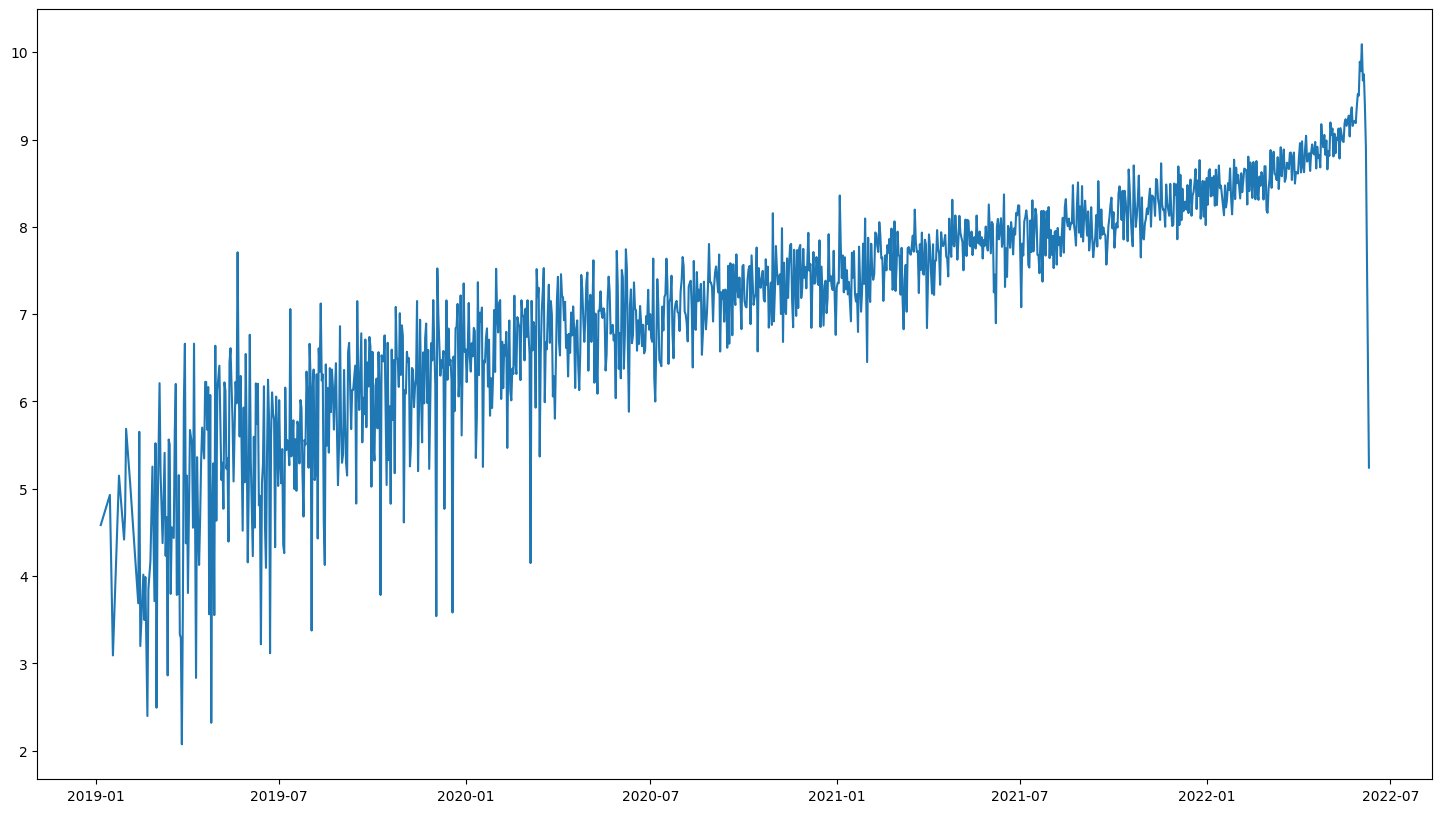

In [ ]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(18,10))
sales_log=np.log(sales_complete2)
plt.plot(sales_log)

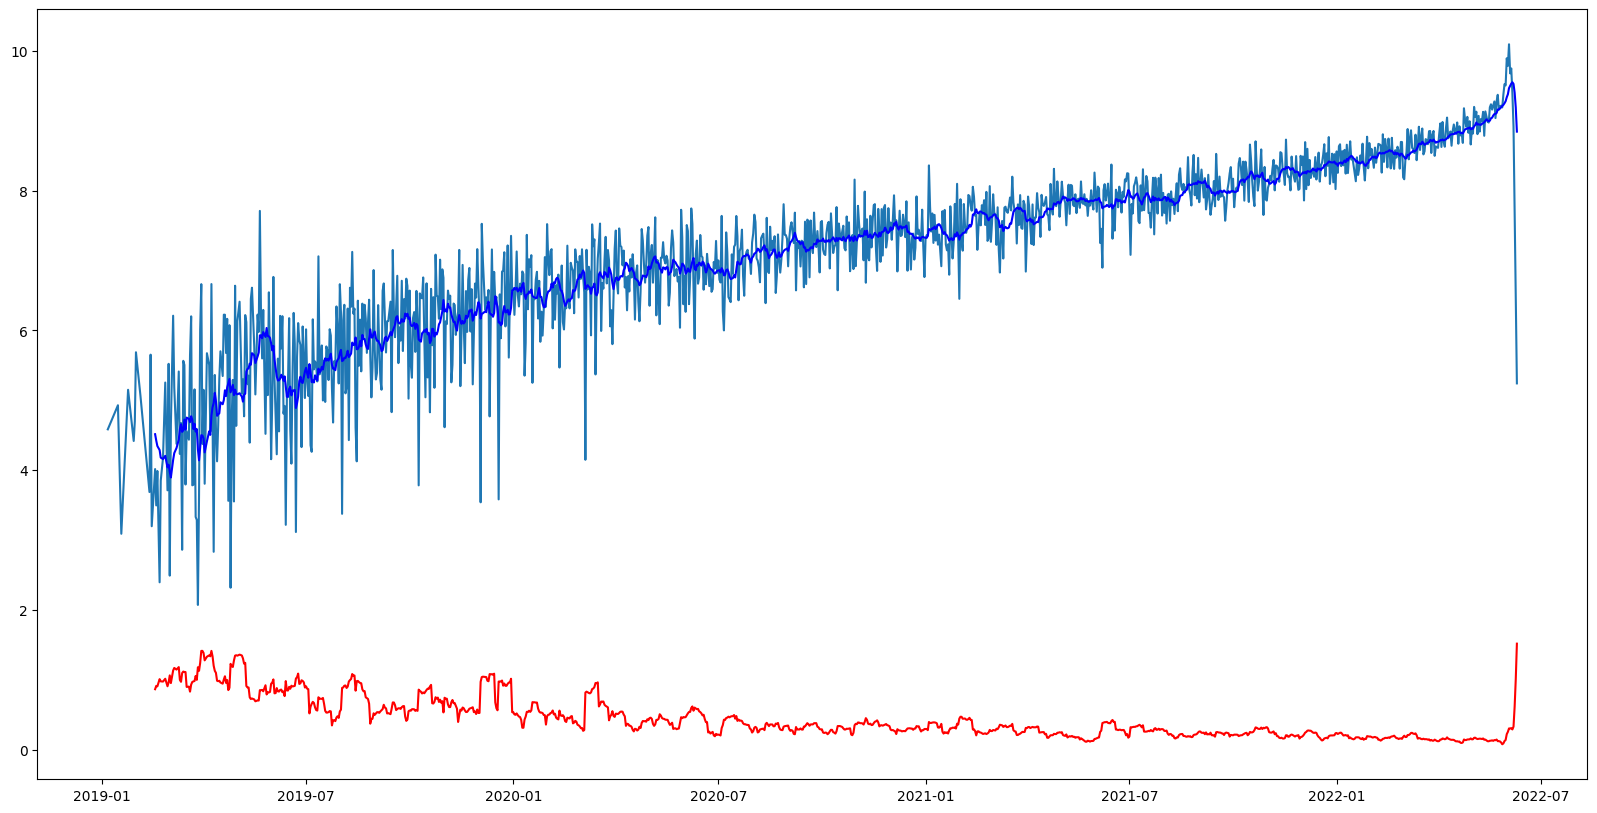

In [ ]:
# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))

MAvg=sales_log.rolling(window=12).mean()
MStd=sales_log.rolling(window=12).std()

plt.plot(sales_log)
plt.plot(MAvg, color='blue')
plt.plot(MStd, color='red')

In [ ]:
# Hitung difference dari sales_log dengan MAvg
sales_log_diff=sales_log-MAvg

# Tampilkan 12 baris teratas dari sales_log_diff
sales_log_diff.head(15)

sale_price
delivered_at            
2019-01-06           NaN
2019-01-15           NaN
2019-01-18           NaN
2019-01-24           NaN
2019-01-29           NaN
2019-01-30           NaN
2019-01-31           NaN
2019-02-04           NaN
2019-02-12           NaN
2019-02-13           NaN
2019-02-14           NaN
2019-02-17     -0.498663
2019-02-18     -0.927696
2019-02-19     -0.356868
2019-02-21     -1.891028

In [ ]:
# Efek dari rolling di atas, maka akan ada value NaN, sehingga kita bisa lakukan dropna()
sales_log_diff=sales_log_diff.dropna()
sales_log_diff.head()

sale_price
delivered_at            
2019-02-17     -0.498663
2019-02-18     -0.927696
2019-02-19     -0.356868
2019-02-21     -1.891028
2019-02-22     -0.329722

In [ ]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller

def stationarity(timeseries):

    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()

    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean')
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['sale_price'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

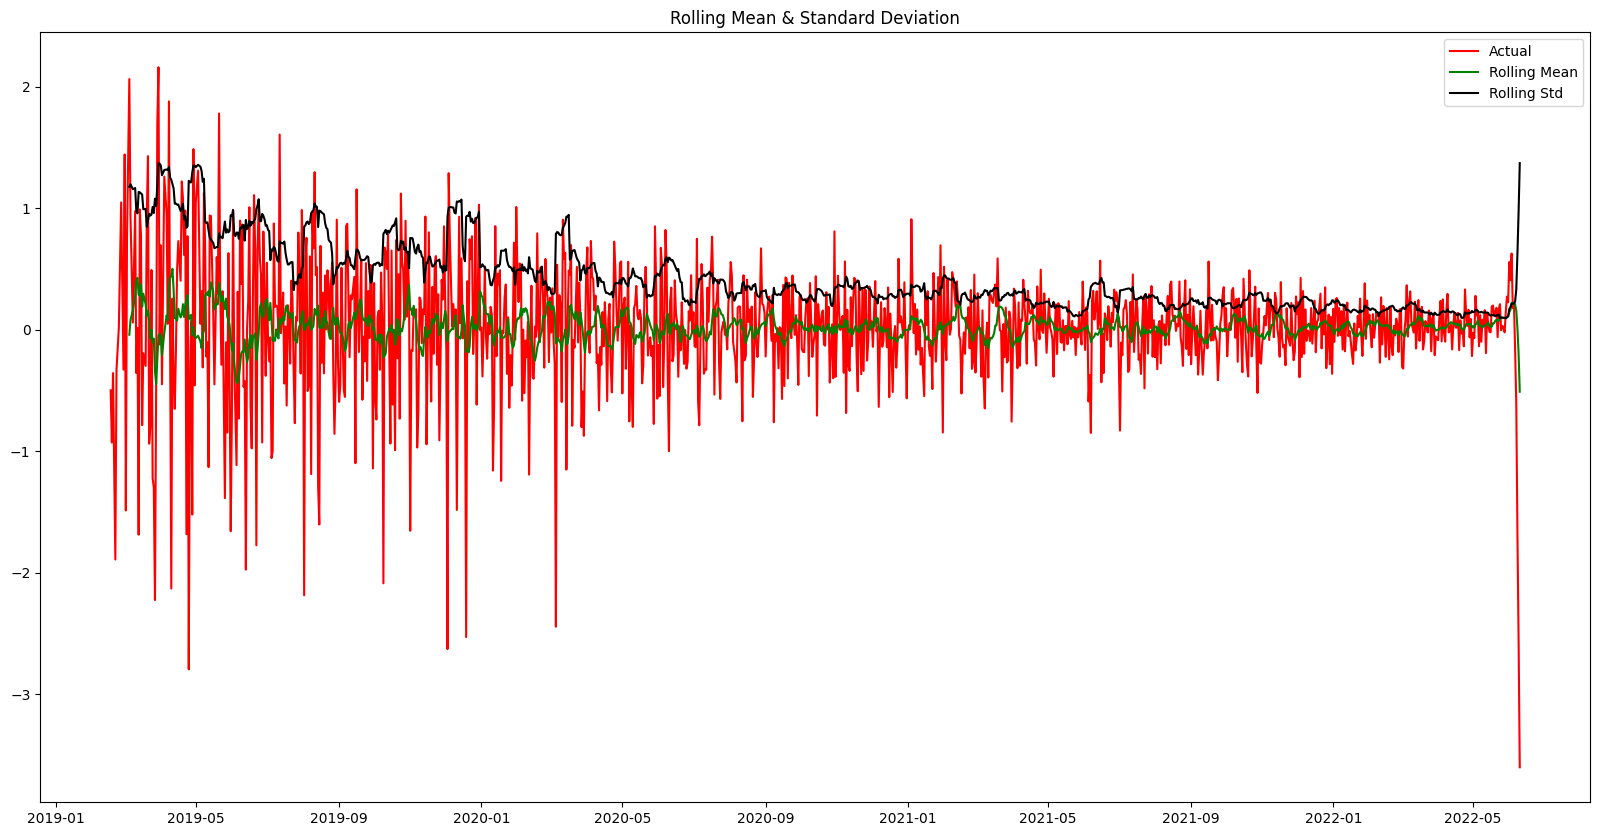

Dickey-Fuller Test: 
Test Statistic         -1.063964e+01
p-value                 4.968152e-19
Lags Used               2.100000e+01
No. of Obs              1.170000e+03
Critical Value (1%)    -3.435951e+00
Critical Value (5%)    -2.864013e+00
Critical Value (10%)   -2.568087e+00
dtype: float64


In [ ]:
# panggil function dan terapkan pada data_log_diff
stationarity(sales_log_diff)

> **Insights:**

* Dapat dilihat dari hasil Dickey-Fuller test ini, bahwa untuk tingkat keyakinan 5% dan 10% sudah menunjukkan series ini stasioner dimana p-value 0 4.968152e-19 yg < 0.05 menunjukkan bahwa kita menolak null hypothesis (reject to fail H0, accept H1), dan menyatakan bahwa series ini stasioner.

* Namun, karena `t-value (-1.063964e+01) < DF critical value 1%, 5% dan 10%` maka, kita menolak null hypothesis (H0) dan menyatakan bahwa series ini stasioner.

c. Shift test


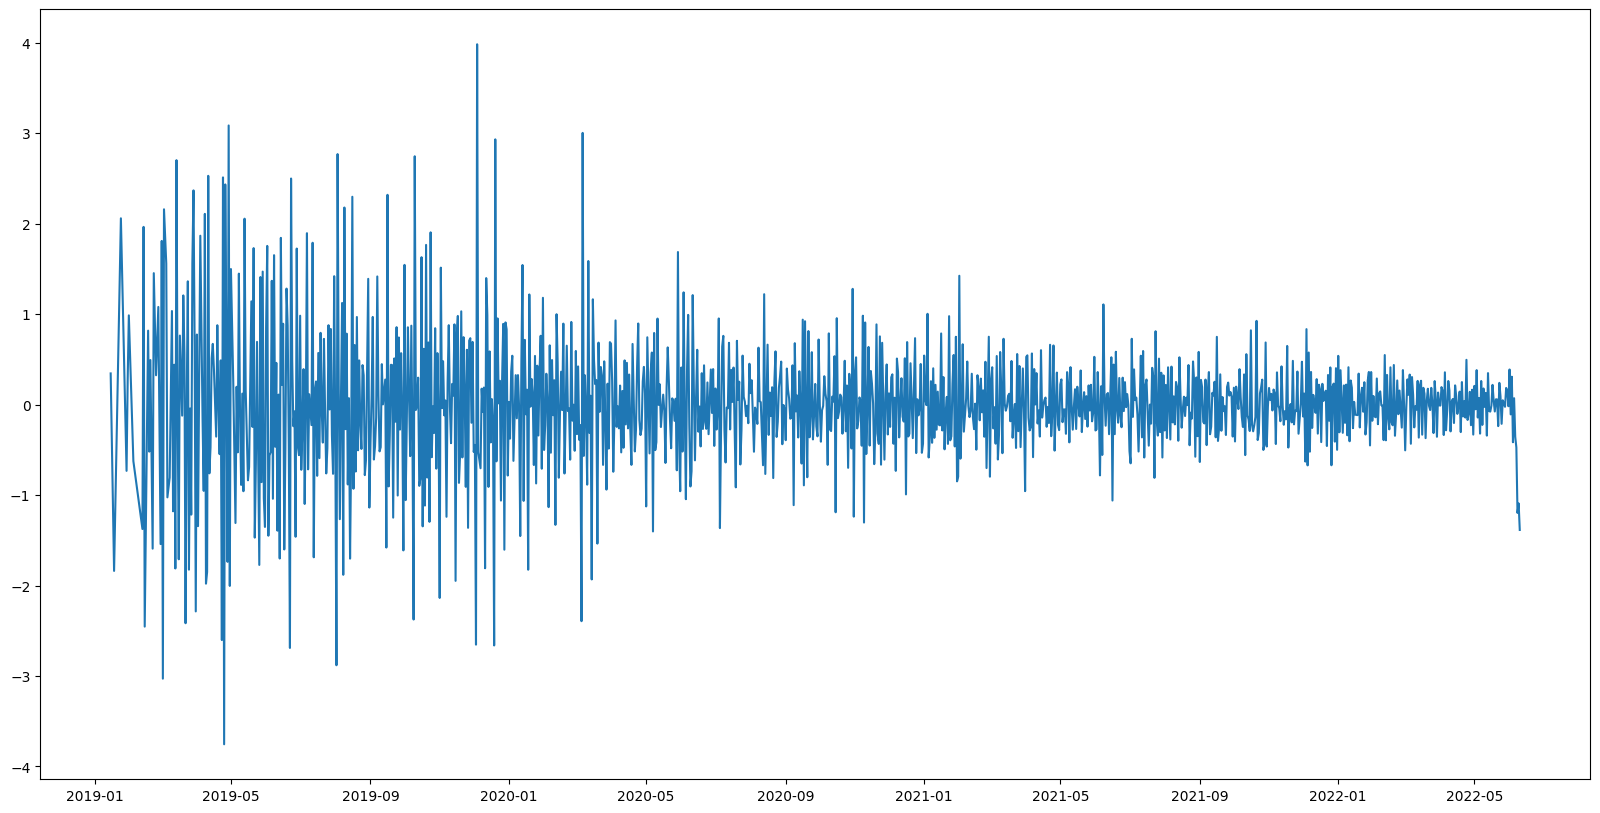

In [ ]:
plt.figure(figsize=(20,10))

# Terapkan shift terhadap data yang telah diterapkan transformasi log di cell sebelumnya
data_shift=sales_log-sales_log.shift()

plt.plot(data_shift)

In [ ]:
# Check missing value
data_shift.isna().sum()

sale_price    1
dtype: int64

In [ ]:
# Lakukan dropna
data_shift=data_shift.dropna()

# Panggil function stationarity dan terapkan pada data_shift yang sudah dibersihkan dari NA value
stationarity(data_shift)

Dickey-Fuller Test: 
Test Statistic         -1.423985e+01
p-value                 1.544425e-26
Lags Used               1.600000e+01
No. of Obs              1.185000e+03
Critical Value (1%)    -3.435880e+00
Critical Value (5%)    -2.863982e+00
Critical Value (10%)   -2.568070e+00
dtype: float64


#####3.2.2 Decomposition

* Forecasting menggunakan data historikal dimana diurutkan dengan waktu, sehingga goal dari time series model yaitu untuk menemukan waktu dengan trend, seasonality, dan autocorrelation (correlation over time) lalu diformulasikan menjadi sebuah model.

* Teknik Decomposition ini digunakan untuk split data time series menjadi beberapa komponen yaitu trend, seasonality, dan noise (residual) components.

* Setiap komponen dapat digunakan untuk menunjukkan pola (pattern) yang ada di dalam tiap kategori agar dapat menentukan apakah model Additive atau Multiplicative.

  * **Seasonality**: describes the periodic signal in your time series.
  * **Trend**: describes whether the time series is decreasing, constant, or increasing over time.
  * **Noise**: describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.


In [ ]:
# Decomposition
# panggil function seasonal_decompose () dari statsmodels.tsa yang diterapkan di variabel data_log
decomp=seasonal_decompose(sales_log, freq=500)

# buat variabel trend, seasonal, residual yang sudah diterapkan
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

# Format gambar
plt.subplot(411)
plt.plot(sales_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

TypeError: ignored

In [ ]:
# Tampilkan nilai dari tiap kategori dari 24 baris teratas
print("Trend \n",trend.head(24), '\n') # \n untuk menambahkan baris di akhir
print("Seasonal \n",seasonal.head(24), '\n')
print("Residual \n",residual.head(24), '\n')

In [ ]:
# assign variable baru decomp_data dengan variabel residual di atas
decomp_data=residual

decomp_data=decomp_data.dropna()
stationarity(decomp_data)

##### 3.2.3 Autocorrelation

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

#### 3.3 Modelling : Forecasting

##### 3.3.1 Data Splitting

* Pisahkan data time series menjadi train dan test data




In [ ]:
# Split the data untuk 42 month test
train = sales_complete2[0:int(len(sales_complete2)*0.80)]   #train data sebesar 80%
test = sales_complete2[int(len(sales_complete2)*0.80):]     #test data sebesar 20%
print(train.shape) # mengetahui ukuran data train
print(test.shape) # mengetahui ukuran data test

##### 3.3.2 Model Development

> Pada Model Development, kita akan mencoba menerapkan 3 model time series yaitu:
1. Holt-Winters
2. SARIMAX (pada dasarnya ini adalah ARIMA, yang memang spesifik untuk menghadapi seasonal effect seperti yg dialami oleh data yg sedang kita olah ini)
3. Prophet


###### **a. HoltWinters**

****

* Metode Holt-Winters adalah model dari time series behavior. Forecasting selalu memerlukan model, dan Holt-Winters adalah salah satu cara untuk modeling 3 aspek dari time series, yaitu : nilai rata-rata, slope dan seasonality

In [ ]:
model_data = ExponentialSmoothing(np.asarray(train['sale_price']),seasonal_periods=36, trend='add',seasonal='mul').fit(optimized=True)

In [ ]:
#copy 42 bulan periode (2019-01 - 2022-06) untuk test dan assign ke data_Holt
data_Holt = test.copy()

In [ ]:
data_Holt['Holt'] = model_data.forecast(len(test['sale_price']))

In [ ]:
data_Holt.head()

In [ ]:
#params untuk mengubah data pada variabel model_data menjadi sebuah dictionary
model_data.params

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['sale_price'], label='Train')
plt.plot(test['sale_price'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)

* Dari grafik di atas terlihat bahwa model Holt-winters mulai melakukan prediksi pd 2019-01 s/d 2022-07 yang ditunjukkan oleh garis berwarna hijau.

* Garis berwarna biru merupakan data yang digunakan untuk train dan garis berwarna oranye yang digunakan untuk test.

###### **b. SARIMAX**

****

* Karena ARIMA tidak mendukung seasonality, maka beda dengan SARIMAX yang dapat digunakan pada data set yang memiliki siklus musiman (*seasonality*).

* terdiri dari 3 parameter yaitu (p, d, dan q)
  * p is the order of the AR term
  * q is the order of the MA term
  * d is the number of differencing required to make the time series stationary

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
train_log = np.log10(train['sale_price'])

In [ ]:
seasonal_pdq

In [ ]:
seasonal_pdq

In [ ]:
for param in pdq: #Non-Seasonal
    for param_seasonal in seasonal_pdq:

        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_log,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal #Store the best param values : AIC, P, D, Q [Non-S / Seas]
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

In [ ]:
# tampilkan hasil dari SARIMAX
mod = sm.tsa.statespace.SARIMAX(train_log,
                                order=(0,1,1),
                                seasonal_order=(1,0,1,12),
                                enforce_stationarity=True)

best_results = mod.fit()

print(best_results.summary().tables[1])

In [ ]:
# Terapkan function get_prediction() pada best_results
pred_dynamic = best_results.get_prediction(data_test=pd.to_datetime('2019-01-06'), dynamic=True, full_results=True)
pred_dynamic

In [ ]:
pred99 = best_results.get_forecast(steps=29, alpha=0.1)
pred99

In [ ]:
# Extract the predicted and true values of our time series
# sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['forecast'] = np.power(10, pred99.predicted_mean)

In [ ]:
testCopy.head(10)

In [ ]:
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci

In [ ]:
# visualisasikan dari antara train, test, dan hasil forecast

axis = train['sale_price'].plot(label='Train Data', figsize=(10, 6))
testCopy['sale_price'].plot(ax=axis, label='Test Data', alpha=0.7)
testCopy['forecast'].plot(ax=axis, label='Forecasted ', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('sale_price')
plt.legend(loc='best')
plt.show()
plt.close()

######  **c. Plot forecast with Confidence band**

> Tahap ini kita akan melakukan visualisasi nilai prediksi beserta interval keyakinan

**Forecast sale_price using the best fit model**

In [ ]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 36
idx = pd.date_range(sales_complete2.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]),
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]),
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

In [ ]:
# plot the forecast along with the confidence band
axis = sales_complete2['sale_price'].plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

###### **d.Prophet**

In [ ]:
train.reset_index(inplace = True)
train.rename(columns={'delivered_at':'ds', 'sale_price':'y'}, inplace = True)

train


In [ ]:
test.reset_index(inplace = True)
test.rename(columns={'delivered_at':'ds', 'sale_price':'y'}, inplace = True)

test

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(train)

In [ ]:
sales_test_fcst = model.predict(test)

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(sales_test_fcst, ax=ax)
plt.show()

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(test['ds'], test['y'], color='r')
fig = model.plot(sales_test_fcst, ax=ax)

### 3.4 **Model Evaluation**

>Sekarang kita akan melakukan validasi dan evaluasi terhadap model yang telah kita buat

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

* Grafik standardized residuals menunjukkan bahwa sebagian besar titik sudah berada pada y=0 yang berarti bahwa prediksi tidak menyimpang jauh dari data aktual.

* Grafik histogram sudah menunjukkan kecenderungan normal (garis hijau adalah grafik garis dari ujung histogram) dan KDE menunjukkan grafik kecocokan prediksi.

* Q–Q plot adalah probability plot, yang mana digunakan untuk mengecek apakah data kita berada pada garis normal.

* Correlogram, juga dikenal sebagai Auto Correlation Function (ACF) plot, meruapakan cara grafis untuk memperlihatkan korelasi serial pada data yang tidak selalu konstan dalam kurun waktu tertentu. Correlogram akan memperlihatkan gambaran apakah terdapat auto-correlation diantara pasangan data pada kurun waktu yang berbeda.

## **4. DEPLOYMENT**

In [ ]:
# visualisasi hasil forecast dari model FB Prophet dengan data aktual
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(test['ds'], test['y'], color='r')
fig = model.plot(sales_test_fcst, ax=ax)

In [ ]:
# Prediksi tahun berikutnya
prediksi_tahun_berikutnya = pd.DataFrame(columns=['ds', 'y'])

In [ ]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(sales_test_baru_fcst,
                 ax=ax)
fig = plt.suptitle("Prediksi sale price 2022 - 2023")
plt.show()

Penjualan diprediksi akan menaik dengan jumlah penjualan diakhir waktu prediksi (Juli 2023) kurang lebih $6500

In [ ]:
#Mengunduh file hasil cleansing
sales.to_csv('salesfix.csv')